In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def deflection(x, Mp, Fx, L):
    """
    Deflection profile of the k-fiber, given
    a moment at the pole and an axial force.
    """
    k = np.sqrt(Fx)
    y = np.sin(k*(L-x))/np.sin(k*L) - (L-x)/L
    y *= Mp/Fx
    return y

In [40]:
def find_Mp(y_target, Fx, L, Mp_min = 0, Mp_max = 1e3):
    """
    For a given axial force `Fx`, recursively finds 
    the corresponding moment at the pole Mp that yields 
    the target maximum y-deflection `y_target`.
    """
    x = np.linspace(0, L, 100)
    
    Mp_avg = 0.5*(Mp_min + Mp_max)
    y = deflection(x, Mp_avg, Fx, L)
    y_avg = y.max()
    
    if np.abs(y_avg-y_target)/y_target < 1e-3:
        return Mp_avg
    
    y = deflection(x, Mp_min, Fx, L)
    y_min = y.max()
    
    y = deflection(x, Mp_max, Fx, L)
    y_max = y.max()
    
    if y_avg > y_target:
        return find_Mp(y_target, Fx, L, Mp_min = Mp_min, Mp_max = Mp_avg)
    else:
        return find_Mp(y_target, Fx, L, Mp_min = Mp_avg, Mp_max = Mp_max)

### Fixed $y_{max}$ studies

In [18]:
L = 10 # End-to-end distance
y_target = 0.1*L # Fixed y_{max}
Fc = np.pi**2/L**2 # Critical buckling force

# Range of axial forces
Fx_ls = np.logspace(-3, -0.001, 100)*Fc

# Corresponding moments at the pole
Mp_ls = np.zeros_like(Fx_ls)

# Corresponding x-positions of the peak
x_peak_ls = np.zeros_like(Fx_ls)

# List of x-coordinates to find x_{peak}
x = np.linspace(0, L, 10000)

for i in range(len(Fx_ls)):
    Fx = Fx_ls[i]
    Mp_ls[i] = find_Mp(y_target, Fx, L)
    
    y = deflection(x, Mp_ls[i], Fx, L)
    x_peak = x[np.where(y==y.max())[0][0]]
    x_peak_ls[i] = x_peak

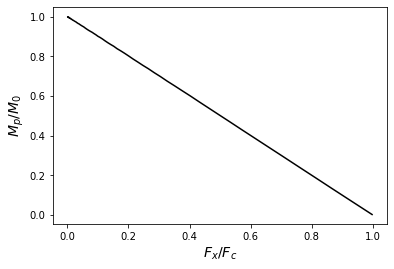

In [24]:
plt.plot(Fx_ls/Fc, Mp_ls/Mp_ls[0], color='k')
plt.xlabel(r'$F_x/F_c$', fontsize=14)
plt.ylabel(r'$M_p/M_0$', fontsize=14)
plt.savefig()
plt.show()

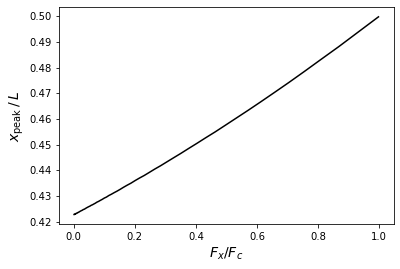

In [35]:
plt.plot(Fx_ls/Fc, x_peak_ls/L, color='k')
plt.xlabel(r'$F_x/F_c$', fontsize=14)
plt.ylabel(r'$x_{\rm peak}\,/\,L$', fontsize=14)
plt.show()

### $L$-dependence studies

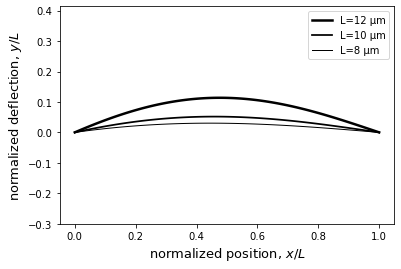

In [77]:
Mp = 0.04
Fx = 0.05
lw_ls = [2.5, 1.75, 1]

for i, L in enumerate([12, 10, 8]):
    x = np.linspace(0, L, 100)
    y = deflection(x, Mp, Fx, L)
    plt.plot(x/L, y/L, label= 'L=' + str(L) + ' μm', lw=lw_ls[i], color='k')

plt.legend()
plt.axis('equal')
plt.xlabel(r'normalized position, $x/L$', fontsize=13)
plt.ylabel(r'normalized deflection, $y/L$', fontsize=13)
plt.show()